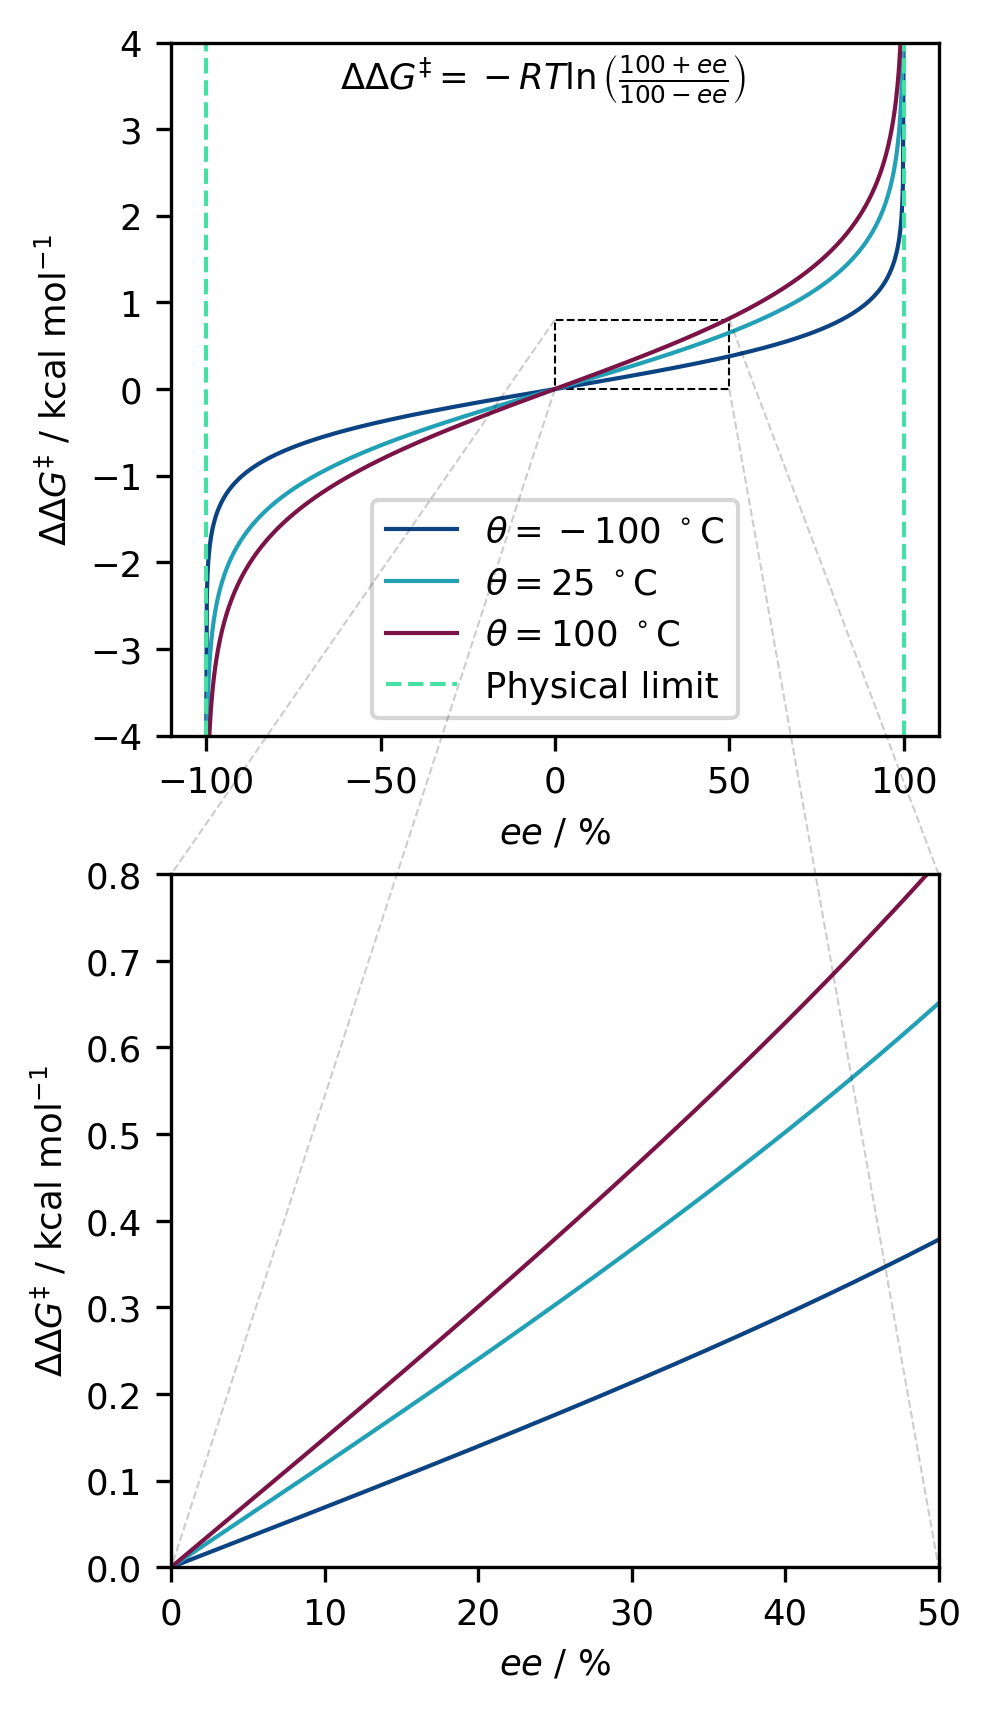

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fontsize = 8.5

gensch_palette = ['#0C4383',
                '#22A0B6',
                '#46E0A6',
                '#7B1346',
                '#CB0C59']
plt.style.use('default')
plt.rcParams['font.size'] =fontsize


# Create data for the functions
x = np.linspace(-99.999, 99.999, 1000)

R_const = 8.31446261815324/1000
T = 298.15
ddg_rt = np.log((1 + x/100) / (1 - x/100)) * R_const * T / 4.1839954
T = 173.15
dgg_173 = np.log((1 + x/100) / (1 - x/100)) * R_const * T / 4.1839954
T = 373.15
dgg_373 = np.log((1 + x/100) / (1 - x/100)) * R_const * T / 4.1839954

alpha_rec = 0.2

# Custom color palette
custom_palette = gensch_palette

# Define the zoomed-in region
zoom_x_min, zoom_x_max = 0, 50
zoom_y_min, zoom_y_max = 0, 0.8

# Create the subplots
fig, axes = plt.subplots(2, 1, figsize=(3.3, 6.6), dpi=300)
#fig.suptitle('Functional behavior of $\Delta\Delta G$ vs $ee$')

axes[0].plot(x, dgg_173, color=custom_palette[0], linewidth=1, label=r'$\theta = -100$' + ' ' + r'$^\circ$C')
axes[0].plot(x, ddg_rt, color=custom_palette[1], linewidth=1, label=r'$\theta = 25$' + ' ' + r'$^\circ$C')
axes[0].plot(x, dgg_373,color=custom_palette[3], linewidth=1, label=r'$\theta = 100$' + ' ' + r'$^\circ$C')
axes[0].axvline(x=100, linestyle='--', linewidth=1, color=custom_palette[2])
axes[0].axvline(x=-100, linestyle='--',  linewidth=1, color=custom_palette[2], label='Physical limit')

#axes[0].set_title('Physical limitations of $ee$ modeling')
axes[0].set_xlabel('$ee$ / %')
axes[0].set_ylabel(r'$\Delta\Delta G^‡$ / kcal mol$^{-1}$')
axes[0].set_ylim([-4, 4])
axes[0].set_xlim([-110, 110])
axes[0].legend()

# Add a rectangle to the original plot to indicate the zoomed-in region
rect = Rectangle((zoom_x_min, zoom_y_min), zoom_x_max - zoom_x_min, zoom_y_max - zoom_y_min, 
                 linewidth=0.5, edgecolor='black', facecolor='none', linestyle='--')
axes[0].add_patch(rect)

# Create the zoomed-in plot
axes[1].plot(x, dgg_173, linewidth=1, color=custom_palette[0])
axes[1].plot(x, ddg_rt, linewidth=1, color=custom_palette[1])
axes[1].plot(x, dgg_373, linewidth=1, color=custom_palette[3])
#axes[1].set_title('Zoomed-in near-linear temperature dependence on $\Delta\Delta G$')

axes[1].set_xlabel('$ee$ / %')
axes[1].set_xlim([zoom_x_min, zoom_x_max])
axes[1].set_ylim([zoom_y_min, zoom_y_max])
#axes[1].legend()

# Connect the corners of the rectangle with the corners of the zoomed-in plot
for corner in [(zoom_x_min, zoom_y_min), (zoom_x_min, zoom_y_max), (zoom_x_max, zoom_y_min), (zoom_x_max, zoom_y_max)]:
    coord1 = axes[0].transData.transform(corner)
    coord2 = axes[1].transData.transform(corner)
    
    coord1_fig = fig.transFigure.inverted().transform(coord1)
    coord2_fig = fig.transFigure.inverted().transform(coord2)
    
    fig.add_artist(plt.Line2D([coord1_fig[0], coord2_fig[0]], [coord1_fig[1], coord2_fig[1]], color='black', linestyle='--',
                               alpha=alpha_rec, linewidth=.5, transform=fig.transFigure))
# Define the fractions to include in the title
frac1 = '100 + ee'
frac2 = '100 - ee'

# Set the plot title with the fractions included using LaTeX
plt.suptitle(fr'$\Delta\Delta G^‡ = -RT \ln \left(\frac{{{frac1}}}{{{frac2}}}\right)$', y=0.875, fontsize=fontsize)

# Remove the right spine
axes[1].set_ylabel(r'$\Delta\Delta G^‡$ / kcal mol$^{-1}$')
#axes[1].spines['left'].set_visible(False)
# Remove the y-axis from the second subplot
#axes[1].set_yticks([])
#axes[1].set_yticklabels([])
plt.savefig('Fig2.png', dpi=300, bbox_inches='tight')
plt.show()


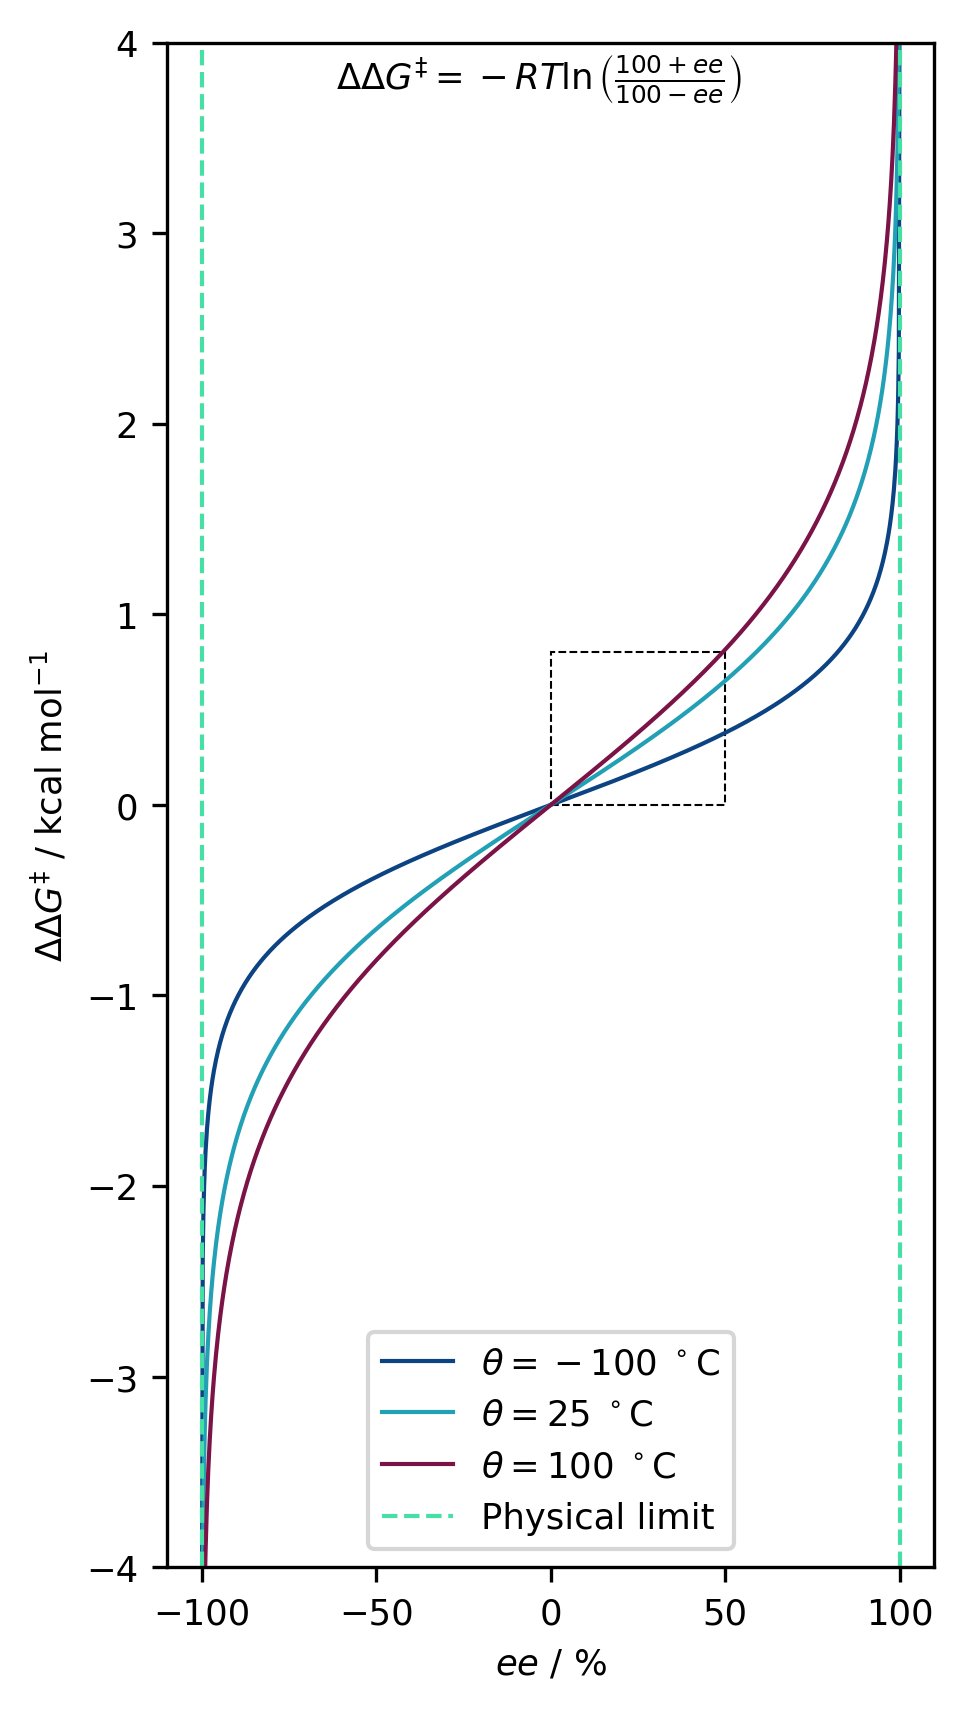

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fontsize = 8.5

gensch_palette = ['#0C4383',
                '#22A0B6',
                '#46E0A6',
                '#7B1346',
                '#CB0C59']
plt.style.use('default')
plt.rcParams['font.size'] =fontsize


# Create data for the functions
x = np.linspace(-99.999, 99.999, 1000)

R_const = 8.31446261815324/1000
T = 298.15
ddg_rt = np.log((1 + x/100) / (1 - x/100)) * R_const * T / 4.1839954
T = 173.15
dgg_173 = np.log((1 + x/100) / (1 - x/100)) * R_const * T / 4.1839954
T = 373.15
dgg_373 = np.log((1 + x/100) / (1 - x/100)) * R_const * T / 4.1839954

alpha_rec = 0.2

# Custom color palette
custom_palette = gensch_palette

# Define the zoomed-in region
zoom_x_min, zoom_x_max = 0, 50
zoom_y_min, zoom_y_max = 0, 0.8

# Create the subplots
fig, axes = plt.subplots(1, 1, figsize=(3.3, 6.6), dpi=300)
#fig.suptitle('Functional behavior of $\Delta\Delta G$ vs $ee$')

axes.plot(x, dgg_173, color=custom_palette[0], linewidth=1, label=r'$\theta = -100$' + ' ' + r'$^\circ$C')
axes.plot(x, ddg_rt, color=custom_palette[1], linewidth=1, label=r'$\theta = 25$' + ' ' + r'$^\circ$C')
axes.plot(x, dgg_373,color=custom_palette[3], linewidth=1, label=r'$\theta = 100$' + ' ' + r'$^\circ$C')
axes.axvline(x=100, linestyle='--', linewidth=1, color=custom_palette[2])
axes.axvline(x=-100, linestyle='--',  linewidth=1, color=custom_palette[2], label='Physical limit')

#axes[0].set_title('Physical limitations of $ee$ modeling')
axes.set_xlabel('$ee$ / %')
axes.set_ylabel(r'$\Delta\Delta G^‡$ / kcal mol$^{-1}$')
axes.set_ylim([-4, 4])
axes.set_xlim([-110, 110])
axes.legend()

# Add a rectangle to the original plot to indicate the zoomed-in region
rect = Rectangle((zoom_x_min, zoom_y_min), zoom_x_max - zoom_x_min, zoom_y_max - zoom_y_min, 
                 linewidth=0.5, edgecolor='black', facecolor='none', linestyle='--')
axes.add_patch(rect)

#axes[1].legend()

# Define the fractions to include in the title
frac1 = '100 + ee'
frac2 = '100 - ee'

# Set the plot title with the fractions included using LaTeX
plt.suptitle(fr'$\Delta\Delta G^‡ = -RT \ln \left(\frac{{{frac1}}}{{{frac2}}}\right)$', y=0.875, fontsize=fontsize)

plt.savefig('Fig2_onlyTOP_33_66.png', dpi=300, bbox_inches='tight')
plt.show()


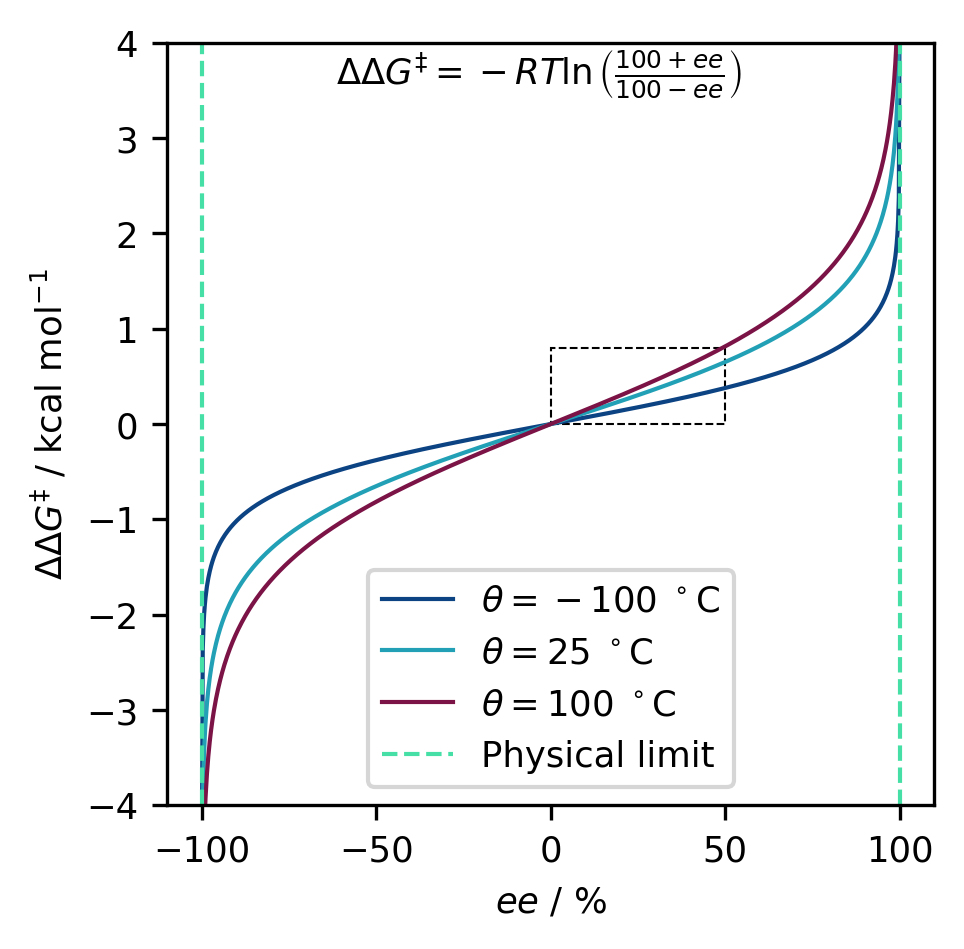

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fontsize = 8.5

gensch_palette = ['#0C4383',
                '#22A0B6',
                '#46E0A6',
                '#7B1346',
                '#CB0C59']
plt.style.use('default')
plt.rcParams['font.size'] =fontsize


# Create data for the functions
x = np.linspace(-99.999, 99.999, 1000)

R_const = 8.31446261815324/1000
T = 298.15
ddg_rt = np.log((1 + x/100) / (1 - x/100)) * R_const * T / 4.1839954
T = 173.15
dgg_173 = np.log((1 + x/100) / (1 - x/100)) * R_const * T / 4.1839954
T = 373.15
dgg_373 = np.log((1 + x/100) / (1 - x/100)) * R_const * T / 4.1839954

alpha_rec = 0.2

# Custom color palette
custom_palette = gensch_palette

# Define the zoomed-in region
zoom_x_min, zoom_x_max = 0, 50
zoom_y_min, zoom_y_max = 0, 0.8

# Create the subplots
fig, axes = plt.subplots(1, 1, figsize=(3.3, 3.3), dpi=300)
#fig.suptitle('Functional behavior of $\Delta\Delta G$ vs $ee$')

axes.plot(x, dgg_173, color=custom_palette[0], linewidth=1, label=r'$\theta = -100$' + ' ' + r'$^\circ$C')
axes.plot(x, ddg_rt, color=custom_palette[1], linewidth=1, label=r'$\theta = 25$' + ' ' + r'$^\circ$C')
axes.plot(x, dgg_373,color=custom_palette[3], linewidth=1, label=r'$\theta = 100$' + ' ' + r'$^\circ$C')
axes.axvline(x=100, linestyle='--', linewidth=1, color=custom_palette[2])
axes.axvline(x=-100, linestyle='--',  linewidth=1, color=custom_palette[2], label='Physical limit')

#axes[0].set_title('Physical limitations of $ee$ modeling')
axes.set_xlabel('$ee$ / %')
axes.set_ylabel(r'$\Delta\Delta G^‡$ / kcal mol$^{-1}$')
axes.set_ylim([-4, 4])
axes.set_xlim([-110, 110])
axes.legend()

# Add a rectangle to the original plot to indicate the zoomed-in region
rect = Rectangle((zoom_x_min, zoom_y_min), zoom_x_max - zoom_x_min, zoom_y_max - zoom_y_min, 
                 linewidth=0.5, edgecolor='black', facecolor='none', linestyle='--')
axes.add_patch(rect)

#axes[1].legend()

# Define the fractions to include in the title
frac1 = '100 + ee'
frac2 = '100 - ee'

# Set the plot title with the fractions included using LaTeX
plt.suptitle(fr'$\Delta\Delta G^‡ = -RT \ln \left(\frac{{{frac1}}}{{{frac2}}}\right)$', y=0.875, fontsize=fontsize)

plt.savefig('Fig2_onlyTOP_33_33.png', dpi=300, bbox_inches='tight')
plt.show()
